<a href="https://colab.research.google.com/github/andymiao858/AI-Learn/blob/master/%E6%A6%82%E7%8E%87%E7%BB%9F%E8%AE%A1/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 大数定理
**前面说到我们进行统计的时候，数据量一定要大，这样样本中事件出现的频率就和事件本身的概率大概率接近。当样本大小趋于无穷大时，随机事件的频率就会趋于一个稳定值，这个稳定值就是理论上事件发生的概率。**

<br/>
这也是大数据的基础，互联网公司经常会利用大数据作为样本，来预测用户的喜好。当样本数量足够大的时候，那么由样本推断出来的各个年龄段或者男女的用户喜好，就可以反应对应所有人的喜好。

那么如果样本少呢，我们据此计算出来的结果有多大误差呢？

<br/>
以扔硬币为例，假设我扔了10次，7次朝上，3次朝下。针对这些样本，我可以估计出硬币正反面的概率。怎么计算呢？
假设硬币正面的概率为a，则反面的概率为1-a。则上述事件发生的概率$P$为

<br/>
$P$ = $C_{10}^7a^7(1-a)^3$

我们要求出a，使得上述事件（扔10次硬币，7次朝上，3次朝下）概率最大，也就是$P$最大。

同样的如果我们扔了1000次硬币，620次朝上，380次朝下。则

<br/>
$P$ = $C_{1000}^{620}a^{620}(1-a)^{380}$

我们先画一下上述曲线，




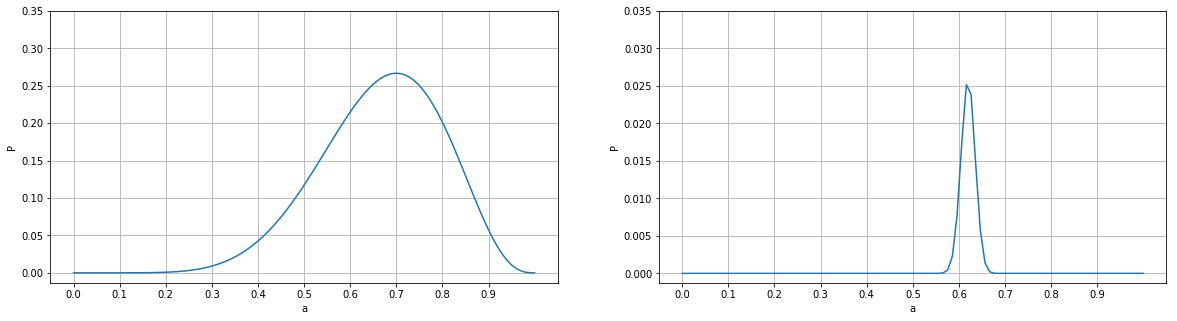

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
import math
x = np.linspace(0, 1, 100)
y = comb(10, 3)*np.power(x, 7)*np.power(1-x, 3)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel("a")
plt.ylabel("P")
x_ticks = np.arange(0, 1, 0.1)
y_ticks = np.arange(0,0.4, 0.05)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

y = comb(1000, 620)*np.power(x, 620)*np.power(1-x, 380)
plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.xlabel("a")
plt.ylabel("P")
x_ticks = np.arange(0, 1, 0.1)
y_ticks = np.arange(0,0.04, 0.005)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.grid()
plt.show()

可以看到，对于扔10次硬币的曲线最高点大概在 a = 0.7处，而扔1000次硬币的曲线，最高点大概在 a = 0.62处，和我们的样本数据都比较吻合。

也就是说，根据样本估计出来的分布参数a是最高的。这也叫做 极大似然估计（maximum likelihood estimation，缩写为MLE）。
</br>  
$P$叫做**极大似然函数**，极大似然函数取最大值时候的a值叫做**极大似然估计**。  

<br/>
那么10个数据和1000个数据到底有什么区别吗？

从图中可以看出，10个数据的时候，似然函数比较平缓，也就是各种可能性的概率都差的不是很多。
而1000个数据的时候，似然函数就比较陡峭，也就是概率比较集中，在极大似然估计附近的概率急剧下降。

这也从数学上给出了解释，当我们抛了10次硬币，7次正面朝上，我们给出硬币朝上的概率是0.7。

但是呢，当朝上概率是0.7的时候，我们抛10次朝上7次的概率是0.27左右。当硬币朝上的概率是0.5，我们抛10次朝上7次的概率大概是0.12，概率也就低了一半左右。所以，当我们给出硬币朝上概率是0.7的时候，这个结果是不可靠的，因为0.7附近很多的值都有可能出现抛10次朝上7次的现象。我们就可以说0.7这个结果可信度比较低。

<br/>
同样的，当我们抛1000次以后，硬币朝上概率是0.62时的概率是最高的，等于0.025左右。
如果硬币朝上的概率是0.6，概率大概是0.01左右。
如果硬币朝上的概率是0.5，从曲线上可以看出，1000次，620次朝上的概率基本是0。
也就是说0.62这个数据还是非常可靠的，即使差也差不了太多，0.6是有可能的，但是如果概率是0.5，基本就是不可能了。

  
如果抛无限次，这个曲线尖峰会逼近一个恒定值，形状类似于脉冲，也就是一个竖线。这也是**大数定理**的图形化解释。当试验无限次以后，除了脉冲点的值可能性最高，其他的值都是不可靠的，因为其他点的概率会迅速将为0。也就是说，样本测出来的频率和事件本身的期望就是一样的了。


<br/>
吴军老师说过 **“大数据的本质是消除不确定性”**，上述曲线我觉得是很好的例证。
